In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
import imblearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 

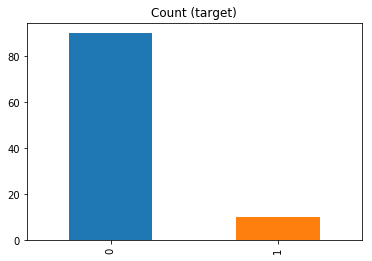

In [65]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=1
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

In [66]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.016150,0.527693,0.568662,1.683788,1.406880,-2.477522,1.018744,1.662330,0.254243,0.986891,...,0.564936,-0.156267,2.218604,-0.438197,1.728553,-0.070641,-0.952357,0.576058,-1.528753,0
1,1.604534,0.186345,2.946322,0.204737,2.696158,0.597269,-0.293594,2.311881,-1.670981,0.079923,...,1.070010,-0.958491,0.426854,-1.080729,1.835100,-2.230898,0.171957,-1.455205,-0.806069,0
2,0.794764,0.395478,-0.612822,1.759456,1.294857,2.391639,0.618029,1.123983,0.074106,1.160694,...,1.450137,0.020639,0.769802,1.588364,2.025951,0.109831,-2.273432,-0.701098,0.631995,0
3,1.340552,-0.036035,-0.292620,0.793551,2.191498,-0.004534,-1.557876,2.193924,0.833827,-1.119005,...,-0.212894,-0.219753,0.208788,0.901000,1.703138,-1.277749,-0.093030,-0.801410,-1.338929,0
4,-0.874388,-2.375302,-1.071145,-0.140657,4.124040,1.553146,-0.202963,2.145510,-1.528091,-0.085507,...,0.041908,-0.109001,-0.443421,-0.547846,3.482543,-0.204270,0.073283,0.845614,0.164630,1


In [67]:
df['target'].value_counts()

0    90
1    10
Name: target, dtype: int64

In [68]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


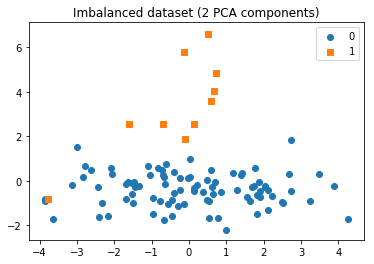

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X =   pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

Removed indexes: [28 53 42 61 27 23 44 22 37 99  4  7 20 26 51 59 75 81 84 88]


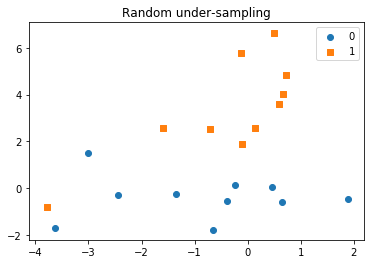

In [70]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

80 new random picked points


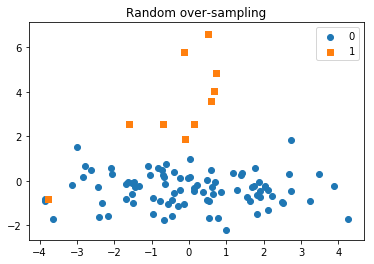

In [71]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

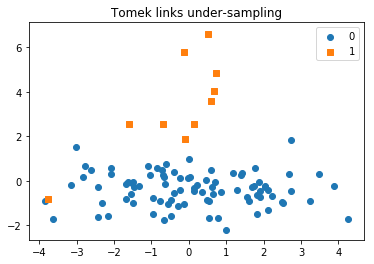

In [73]:
#Removes close pair majority classes

from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=False, ratio='majority')
X_tl, y_tl = tl.fit_sample(X, y)

#print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

Under-sampling: Cluster Centroids

This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In this example we will pass the {0: 10} dict for the parameter ratio, to preserve 10 elements from the majority class (0), and all minority class (1) .

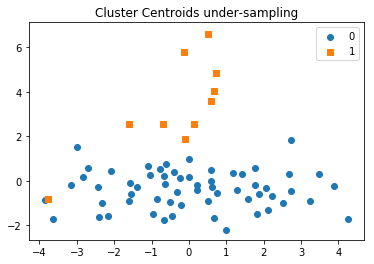

In [79]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 60})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')


Smote

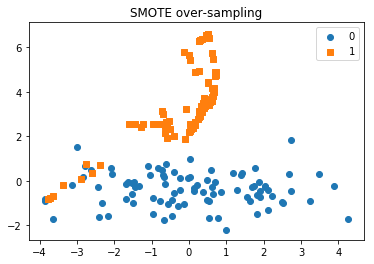

In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

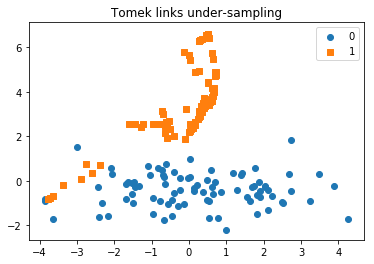

In [82]:
#Removes close pair majority classes

tl = TomekLinks(return_indices=False, ratio='majority')
X_tl, y_tl = tl.fit_sample(X_sm, y_sm)

#print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

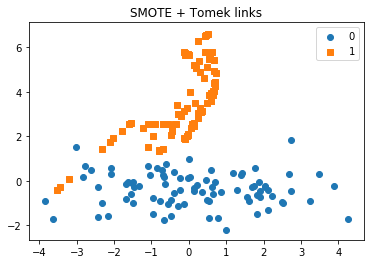

In [83]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')